In [ ]:
import tensorflow as tf
hello = tf.constant("Hello, world!")
sess = tf.Session()
print(sess.run(hello))

In [ ]:
node1 = tf.constant(3.0, tf.float32, name="node1")
node2 = tf.constant(4.0, tf.float32, name="node2")
result = tf.add(node1, node2, name="add")
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(result))
sess.close()

In [ ]:
import tensorflow as tf
value = tf.Variable(0, name="value")
sum = tf.Variable(0, name="sum_value")
one = tf.constant(1)

new_value = tf.add(value, one)
update_value = tf.assign(value, new_value)
new_sum = tf.add(sum, value)
update_sum = tf.assign(sum, new_sum)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(10):
        sess.run(update_value)
        sess.run(update_sum)
    print(sess.run(sum))
sess.close()

In [ ]:
import tensorflow as tf
a=tf.placeholder(tf.float32, name='a')
b=tf.placeholder(tf.float32, name='b')
c=tf.multiply(a, b, name='c')
d=tf.subtract(a, b, name='d')
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result=sess.run([c,d], feed_dict={a:[8.0, 2.0, 3.5], b:[1.5, 2.0, 4.0]})
    print(result)
    print(result[0])
sess.close()

In [ ]:
import tensorflow as tf
tf.reset_default_graph()
logdir='G:\XX\Jupyter Notebook\log'
input1=tf.constant([1.0, 2.0, 3.0], name="input1")
input2=tf.Variable(tf.random_uniform([3]), name="input2")
output=tf.add_n([input1, input2], name="add")

writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
writer.close()

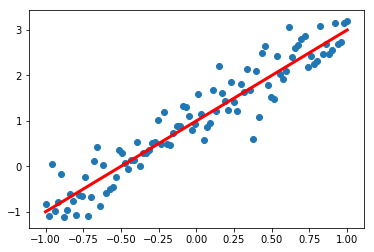

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
np.random.seed(5)
x_data=np.linspace(-1, 1, 100)
y_data=2 * x_data + 1.0 + np.random.randn(*x_data.shape)*0.4
plt.scatter(x_data, y_data)
plt.plot(x_data, 1.0+2.0*x_data, color='red', linewidth=3)

In [2]:
x=tf.placeholder("float", name="x")
y=tf.placeholder("float", name="y")
def model(x, w, b):
    return tf.multiply(x, w) + b
w=tf.Variable(1.0, name="w0")
b=tf.Variable(0.0, name="b0")
pred=model(x, w, b)

train_epochs=10
learning_rate=0.05
# 控制显示loss值得粒度
display_step=10
loss_function=tf.reduce_mean(tf.square(y-pred))
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

Train Epoch: 01 Step:010 loss= 0.007021904
Train Epoch: 01 Step:020 loss= 0.186607897
Train Epoch: 01 Step:030 loss= 0.024833022
Train Epoch: 01 Step:040 loss= 0.620799541
Train Epoch: 01 Step:050 loss= 0.006301077
Train Epoch: 01 Step:060 loss= 0.023637433
Train Epoch: 01 Step:070 loss= 0.354419798
Train Epoch: 01 Step:080 loss= 0.027936857
Train Epoch: 01 Step:090 loss= 0.029015331
Train Epoch: 01 Step:100 loss= 0.106556907
Train Epoch: 02 Step:110 loss= 0.179423183
Train Epoch: 02 Step:120 loss= 0.067458346
Train Epoch: 02 Step:130 loss= 0.000281519
Train Epoch: 02 Step:140 loss= 0.344065875
Train Epoch: 02 Step:150 loss= 0.021391280
Train Epoch: 02 Step:160 loss= 0.006406436
Train Epoch: 02 Step:170 loss= 0.142010629
Train Epoch: 02 Step:180 loss= 0.000233675
Train Epoch: 02 Step:190 loss= 0.094913408
Train Epoch: 02 Step:200 loss= 0.052370854
Train Epoch: 03 Step:210 loss= 0.044097763
Train Epoch: 03 Step:220 loss= 0.082669340
Train Epoch: 03 Step:230 loss= 0.000454877
Train Epoch

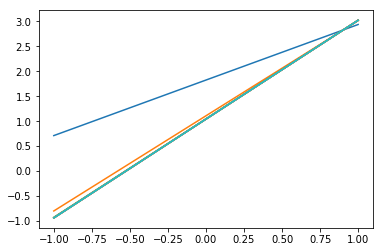

In [3]:
# 开始训练，轮数为epoch，采用SGD随机梯度下降优化方法
step=0
loss_list=[]
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss=sess.run([optimizer, loss_function], feed_dict={x:xs, y:ys})
        loss_list.append(loss)
        step=step+1
        if step % display_step == 0:
            print("Train Epoch:", "%02d" % (epoch+1), "Step:%03d" % (step), "loss=", "{:.9f}".format(loss))
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot(x_data, w0temp*x_data+b0temp)

[1.0133754,
 1.2284044,
 1.0088208,
 1.2116321,
 2.3539772,
 2.3148305,
 1.3175836,
 1.0387748,
 1.5018207,
 1.547514,
 1.5514,
 1.5517284,
 1.5517554,
 1.551758,
 1.551758,
 1.551758,
 1.551758]

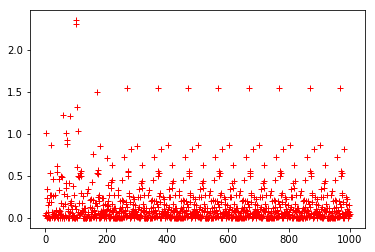

In [5]:
plt.plot(loss_list, 'r+')
[x for x in loss_list if x>1]

In [ ]:
print("w:", sess.run(w))
print("b:", sess.run(b))
plt.scatter(x_data, y_data, label="Original data")
plt.plot(x_data, sess.run(b)+sess.run(w)*x_data, label="Fitted line", color='red', linewidth=3)
plt.legend(loc=2)

In [ ]:
x_test=3.21
predict=sess.run(pred, feed_dict={x: x_test})
print("预测值：%f" % predict)
target=2.0*x_test+1.0
print("目标值：%f" % target)